In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
import statsmodels.stats.multicomp as ml
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Read in data file, make it into a dataframe
f=pd.read_csv("../deception_data/n151_2017/liwc_au.csv")

In [ ]:
# keep only the AU's, filename, and question
keep_col = ['Filename','question','AU01_r','AU02_r','AU04_r','AU05_r','AU06_r','AU07_r','AU09_r','AU10_r','AU12_r','AU14_r','AU15_r','AU17_r','AU20_r','AU23_r','AU25_r','AU26_r','AU45_r']
new_f = f[keep_col]
new_f.to_csv("old_data_au.csv", index=False)

In [ ]:
## Make a subset of the data that includes only the baseline questions
df = new_f[(new_f['question'] < 5)]

In [ ]:
print(df)

In [ ]:
# Function to label each  question based on mental state
def label_question (row):
   if row['question'] == 0 :
      return 'ambiguous'
   if row['question'] == 1 :
      return 'baseline_truth'
   if row['question'] == 2 :
      return 'memory_recall'
   if row['question'] == 3 :
      return 'cognitive'
   if row['question'] == 4 :
      return 'uncomfortable'
   return 'Other'

In [ ]:
df['question_label'] = df.apply(lambda row: label_question (row),axis=1)

In [ ]:
df.to_csv("baseline_questions.csv", index=False)

In [ ]:
df

In [ ]:
# Partition the data based on question label 
amb = df[(df['question_label'] == 'ambiguous')]
bt = df[(df['question_label'] == 'baseline_truth')]
mr = df[(df['question_label'] == 'memory_recall')]
cog = df[(df['question_label'] == 'cognitive')]
unc = df[(df['question_label'] == 'uncomfortable')]

df2 = pd.DataFrame([])
df3 = pd.DataFrame([])

# display average au levels for each type of baseline question
for d in [amb,bt,mr,cog,unc]:
    print('----')
    print(d.mean())
    df2 = df2.append(d.mean(), ignore_index=True)
    df3 = df3.append(d, ignore_index=True)

In [154]:
print(amb)

                                               Filename  question    AU01_r  \
0       2016-03-11_16-16-40-42-W-B-pamela3_openface.csv         0  0.178387   
20    2016-03-15_18-15-13-468-W-T-Sprinkles_openface...         0  0.117715   
46     2016-03-16_10-05-49-922-W-T-tarples_openface.csv         0  0.514009   
58       2016-06-07_12-20-38-706-W-T-pkaye_openface.csv         0  0.168293   
69    2016-06-08_13-59-09-521-W-B-sethdeco_openface.csv         0  0.064951   
78      2016-06-08_14-28-32-854-W-B-JimBob_openface.csv         0  0.162699   
83    2016-06-08_19-02-40-950-W-B-stars33hoc_openfac...         0  0.021891   
99       2016-06-09_09-05-50-814-W-T-chomp_openface.csv         0  0.257186   
109   2016-06-09_09-16-19-112-W-T-pacers101_openface...         0  0.214033   
116   2016-06-09_10-21-37-95-W-B-describer_openface.csv         0  0.004692   
126   2016-06-09_14-57-19-201-W-B-RobbyRoo_openface.csv         0  0.759732   
146     2016-06-10_11-15-58-679-W-T-Obes86_openface.

In [ ]:
# Use the ANOVA one way test for each AU level
for c in df3.iloc[:,2:-1]:
    print(c)
    lm = ols('df3[c] ~ question',data=df3).fit()

    table = sm.stats.anova_lm(lm, typ=1) # Type 2 ANOVA DataFrame
    print(table)
    print('-------\n')

In [ ]:
print(df2)

In [ ]:
ambAU01 = amb['AU01_r']
print(ambAU01)

In [153]:
# Use the ANOVA one way test for each AU level

for c in df3.iloc[:,2:-1]:
    print(c)
    F, p = stats.f_oneway(amb[c],bt[c],mr[c],cog[c],unc[c])
    print(F,p)
    print('-------\n')
    
                     


AU01_r
0.465285894111 0.761243633126
-------

AU02_r
0.667106610707 0.614985374486
-------

AU04_r
0.0104499631283 0.999783988019
-------

AU05_r
2.26395431837 0.0608910266745
-------

AU06_r
0.505636591222 0.731618348618
-------

AU07_r
0.414872917235 0.79798589882
-------

AU09_r
1.43685987481 0.220126706612
-------

AU10_r
0.464257585081 0.761997286947
-------

AU12_r
0.403304244427 0.806330857974
-------

AU14_r
0.444273735634 0.776616297747
-------

AU15_r
1.67610536167 0.153741010307
-------

AU17_r
0.524042754606 0.718103855778
-------

AU20_r
1.1729749033 0.321455495655
-------

AU23_r
1.59062903528 0.175032483024
-------

AU25_r
2.86982480255 0.0224307150592
-------

AU26_r
0.953134092862 0.43270209701
-------

AU45_r
0.964090414621 0.426544194354
-------



In [ ]:
df3

In [149]:
# Now that we have a p-value for AU05 of ~ .06 use Tukey's test to see where
# the significance is coming from

mc = MultiComparison(df3['AU05_r'],df3['question_label'])
result = mc.tukeyhsd()
 
print(result)
print(mc.groupsunique)


     Multiple Comparison of Means - Tukey HSD,FWER=0.05     
    group1         group2     meandiff  lower  upper  reject
------------------------------------------------------------
  ambiguous    baseline_truth  0.0448  -0.0241 0.1137 False 
  ambiguous      cognitive     0.0563  -0.0135 0.1261 False 
  ambiguous    memory_recall   0.0722   0.0031 0.1414  True 
  ambiguous    uncomfortable   0.0402  -0.0293 0.1098 False 
baseline_truth   cognitive     0.0115  -0.0584 0.0815 False 
baseline_truth memory_recall   0.0274  -0.0418 0.0967 False 
baseline_truth uncomfortable  -0.0046  -0.0742 0.0651 False 
  cognitive    memory_recall   0.0159  -0.0543 0.0861 False 
  cognitive    uncomfortable  -0.0161  -0.0867 0.0545 False 
memory_recall  uncomfortable   -0.032  -0.1019 0.0379 False 
------------------------------------------------------------
['ambiguous' 'baseline_truth' 'cognitive' 'memory_recall' 'uncomfortable']


In [150]:
# Now that we have a p-value for AU25 of < .05 use Tukey's test to see where
# the significance is coming from

mc = MultiComparison(df3['AU25_r'],df3['question_label'])
result = mc.tukeyhsd()
 
print(result)
print(mc.groupsunique)

     Multiple Comparison of Means - Tukey HSD,FWER=0.05     
    group1         group2     meandiff  lower  upper  reject
------------------------------------------------------------
  ambiguous    baseline_truth  -0.009  -0.1838 0.1658 False 
  ambiguous      cognitive    -0.1386  -0.3157 0.0385 False 
  ambiguous    memory_recall  -0.0251  -0.2005 0.1503 False 
  ambiguous    uncomfortable  -0.1639  -0.3403 0.0125 False 
baseline_truth   cognitive    -0.1296   -0.307 0.0479 False 
baseline_truth memory_recall  -0.0161  -0.1918 0.1596 False 
baseline_truth uncomfortable  -0.1549  -0.3316 0.0218 False 
  cognitive    memory_recall   0.1135  -0.0646 0.2915 False 
  cognitive    uncomfortable  -0.0253  -0.2044 0.1537 False 
memory_recall  uncomfortable  -0.1388  -0.3162 0.0386 False 
------------------------------------------------------------
['ambiguous' 'baseline_truth' 'cognitive' 'memory_recall' 'uncomfortable']


In [ ]:
df2

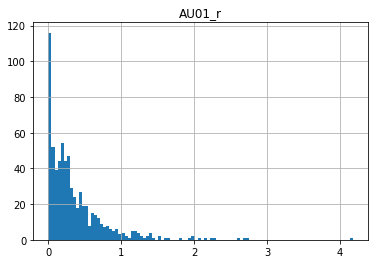

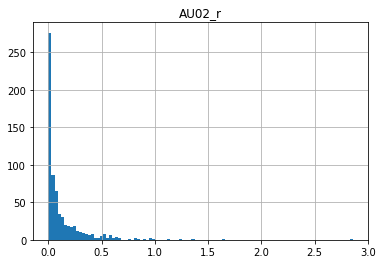

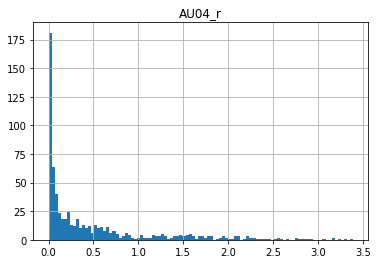

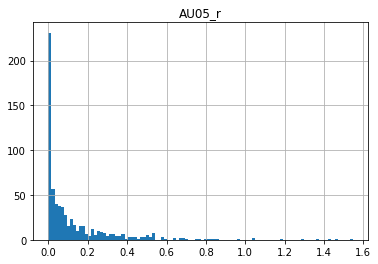

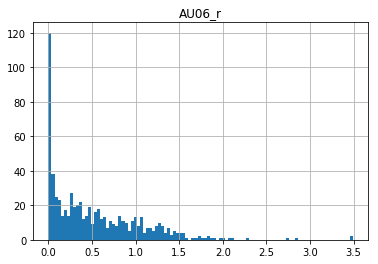

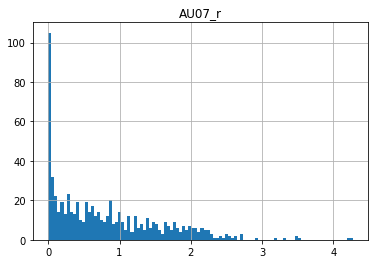

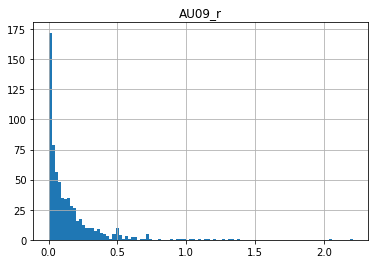

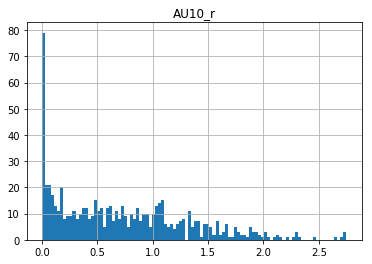

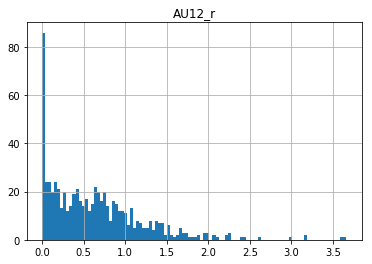

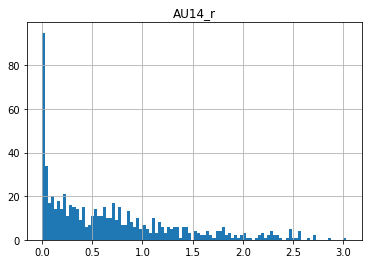

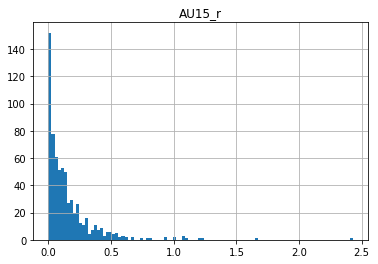

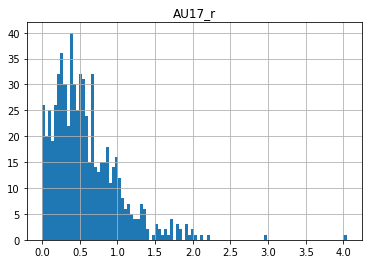

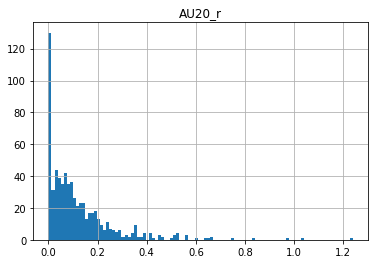

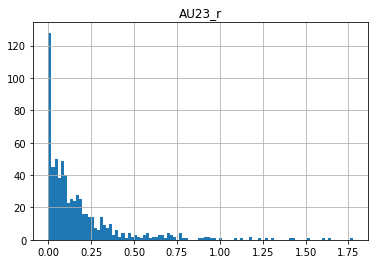

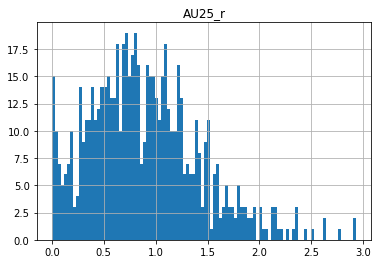

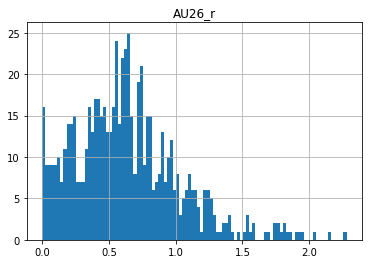

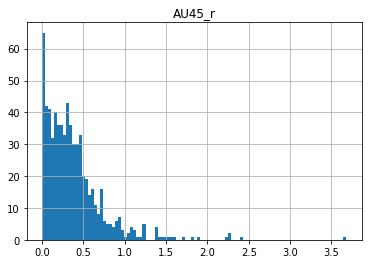

In [151]:
# Plot histograms for distributions of AU levels
for c in df3.iloc[:,2:-1]:
    df3.hist(column = df3[c].name,bins=100)
    


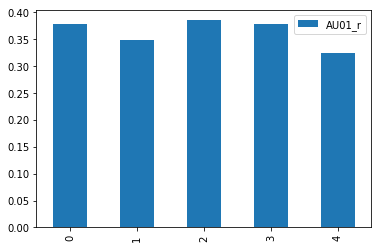

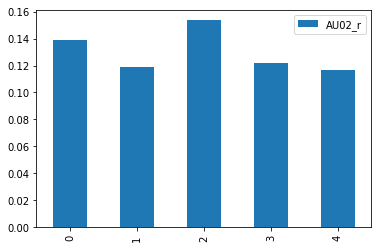

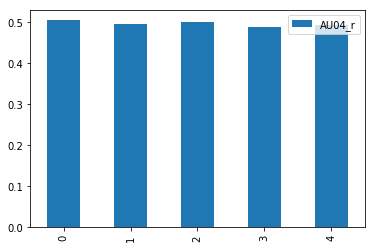

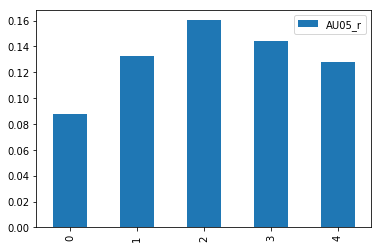

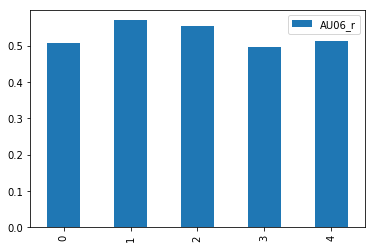

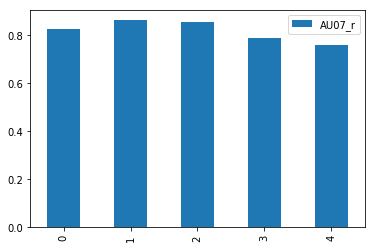

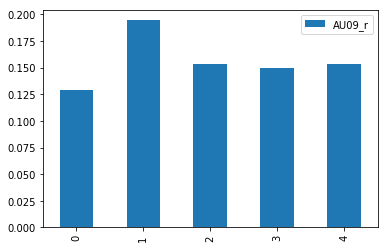

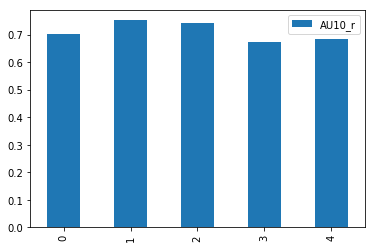

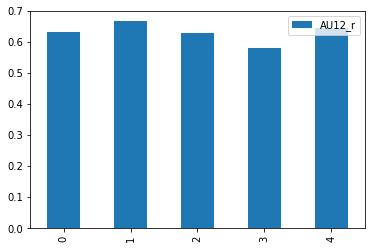

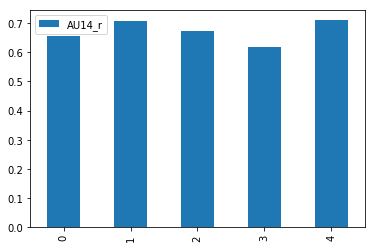

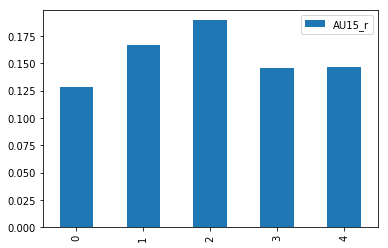

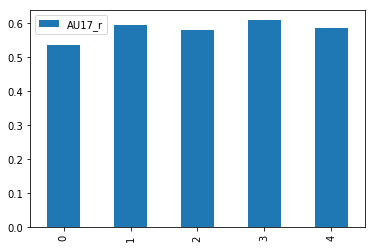

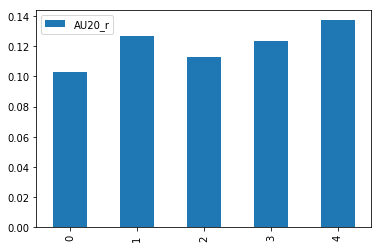

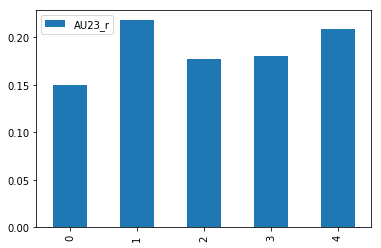

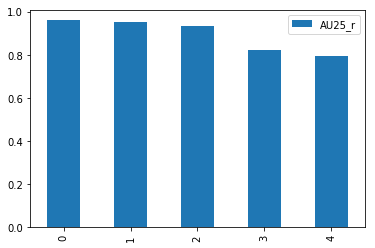

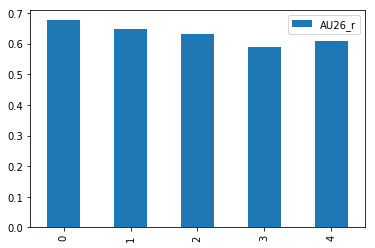

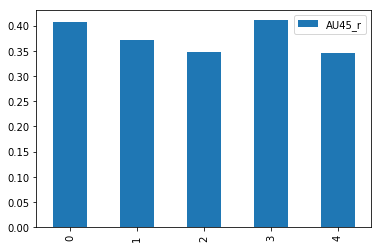

In [152]:
# Plot average AU level for each AU for each question 
for c in df2.iloc[:,:-1]:
    au = pd.DataFrame([])
    au = df2.filter([c],axis=1)
    au.plot.bar()

In [ ]:
lines = text_file.read().split(',')